### Introduction:

In this notebook, I explore and analyze the National Health and Nutrition Examination Survey (NHANES) datasets. The goal is to merge multiple NHANES datasets, perform data wrangling, and create interactive visualizations using the Bokeh package. The analysis aims to discover and visualize interesting relationships within the data, drawing insightful conclusions. Ethical considerations and potential data privacy issues are also discussed.

### Task 1: Data Collection and Merging

In [1]:
#!pip install sas7bdat

In [2]:
import pandas as pd
from sas7bdat import SAS7BDAT  # Required library for reading XPT files

# Load individual datasets
dr2tot_df = pd.read_sas('P_DR2TOT.XPT', format='xport')
demo_df = pd.read_sas('P_DEMO.XPT', format='xport')
aux_df = pd.read_sas('P_AUX.XPT', format='xport')
alb_cr_df = pd.read_sas('P_ALB_CR.XPT', format='xport')
acq_df = pd.read_sas('P_ACQ.XPT', format='xport')

# Merge datasets using SEQN as the common identifier
merged_df = pd.merge(dr2tot_df, demo_df, on='SEQN', how='inner')
merged_df = pd.merge(merged_df, aux_df, on='SEQN', how='inner')
merged_df = pd.merge(merged_df, alb_cr_df, on='SEQN', how='inner')
merged_df = pd.merge(merged_df, acq_df, on='SEQN', how='inner')

In [3]:
#!pip install bokeh

### Task 2: Data Wrangling

2.1 Overview of Data

In [4]:
# Step 3: Explore Data

# Display basic information about the merged DataFrame
print("Info about Merged DataFrame:")
print(merged_df.info())

# Display basic statistics of numerical columns
print("\nSummary Statistics:")
print(merged_df.describe())

# Check for missing values
print("\nMissing Values:")
print(merged_df.isnull().sum())

# Fill missing values with mean for numerical columns
merged_df.fillna(merged_df.mean(numeric_only=True), inplace=True)

Info about Merged DataFrame:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 5147 entries, 0 to 5146
Columns: 214 entries, SEQN to ACD110
dtypes: float64(212), object(2)
memory usage: 8.4+ MB
None

Summary Statistics:
                SEQN      WTDRD1PP      WTDR2DPP     DR2DRSTZ     DR2EXMER  \
count    5147.000000  5.147000e+03  4.432000e+03  5147.000000  3797.000000   
mean   117027.159510  1.816029e+04  2.086016e+04     2.054983    73.436924   
std      4475.911497  2.373296e+04  2.947634e+04     1.757856    16.662949   
min    109264.000000  5.397605e-79  5.397605e-79     1.000000    32.000000   
25%    113163.500000  5.114397e+03  4.694887e+03     1.000000    58.000000   
50%    117050.000000  1.099993e+04  1.157079e+04     1.000000    79.000000   
75%    120907.500000  2.265202e+04  2.620018e+04     5.000000    87.000000   
max    124822.000000  3.558159e+05  4.544105e+05     5.000000    91.000000   

        DRABF       DRDINT      DR2DBIH       DR2DAY      DR2LANG  ...  \
cou

2.2 Data Cleaning and Wrangling

In [5]:
# Check for missing values
print("\nMissing Values:")
print(merged_df.isnull().sum())


Missing Values:
SEQN        0
WTDRD1PP    0
WTDR2DPP    0
DR2DRSTZ    0
DR2EXMER    0
           ..
ACD011A     0
ACD011B     0
ACD011C     0
ACD040      0
ACD110      0
Length: 214, dtype: int64


In [6]:
merged_df.to_csv("merged_dataset.csv", index=False)

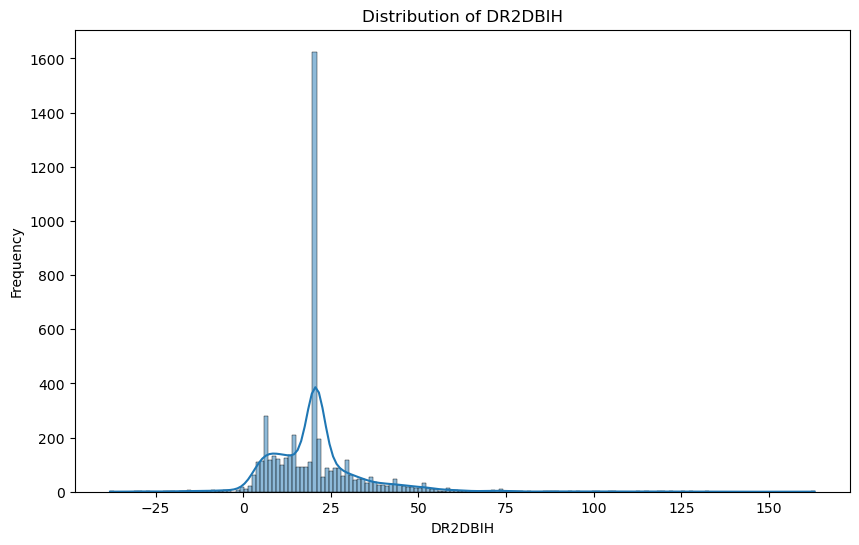

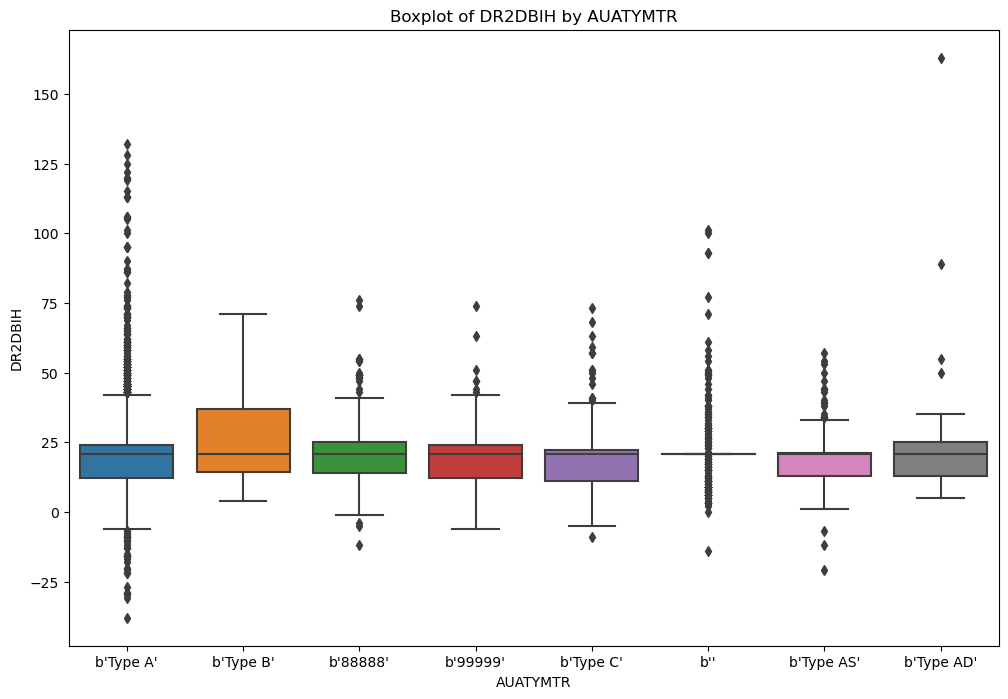

In [7]:
# Basic visualization (customize based on your variables of interest)
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Distribution of a numerical variable
plt.figure(figsize=(10, 6))
sns.histplot(merged_df['DR2DBIH'], kde=True)
plt.title('Distribution of DR2DBIH')
plt.xlabel('DR2DBIH')
plt.ylabel('Frequency')
plt.show()

# Example: Boxplot of a categorical variable against a numerical variable
plt.figure(figsize=(12, 8))
sns.boxplot(x='AUATYMTR', y='DR2DBIH', data=merged_df)
plt.title('Boxplot of DR2DBIH by AUATYMTR')
plt.xlabel('AUATYMTR')
plt.ylabel('DR2DBIH')
plt.show()

The plot represents the **distribution of a variable called "DR2DBIH."** Here are the key observations:

1. **Peak at Zero:**
   - There is a prominent peak at **0** on the x-axis, indicating a high frequency of this value or close values.
   - This suggests that a significant portion of the data points falls around zero for the "DR2DBIH" variable.

2. **Long Tail to the Right:**
   - The distribution is not symmetrical; it has a long tail extending to the right.
   - This means that there are also many occurrences of higher values (greater than zero), although they are less frequent than the zero values.

3. **Overall Shape:**
   - The bars and line in the plot show the frequencies of different values of "DR2DBIH."
   - Most bars are clustered around zero, but as the value increases, fewer bars are visible.
   - The long tail on the right indicates that there are several data points with higher "DR2DBIH" values.

In summary, the plot suggests that while most data points are concentrated around zero, there are also instances of higher values for the "DR2DBIH" variable. 

Certainly! Let's analyze the plot together.

The plot represents the **distribution of a variable called "DR2DBIH"** across different categories under "AUATYMTR." Here are the key observations:

1. **Comparison of Medians:**
   - The median values of "DR2DBIH" for 'b'Type B'' and 'b'Type AD'' are similar.
   - However, 'b'Type AD'' has a wider **interquartile range (IQR)** compared to 'b'Type B''.
   - This suggests that while the central tendency (median) is similar, the spread of data points is greater for 'b'Type AD''.

2. **Outliers and Variability:**
   - The category 'b99999'' has the highest median value for "DR2DBIH."
   - Its data points are densely packed, as indicated by the small IQR.
   - All categories exhibit numerous **outliers**, especially in 'b'Type A''.
   - This indicates significant variability within these categories.

3. **Distribution Concentration:**
   - The distribution for 'b''' is highly concentrated around its median value.
   - In contrast, other categories show more variability.

In summary, this plot provides insights into the distribution of "DR2DBIH" across different "AUATYMTR" categories. 

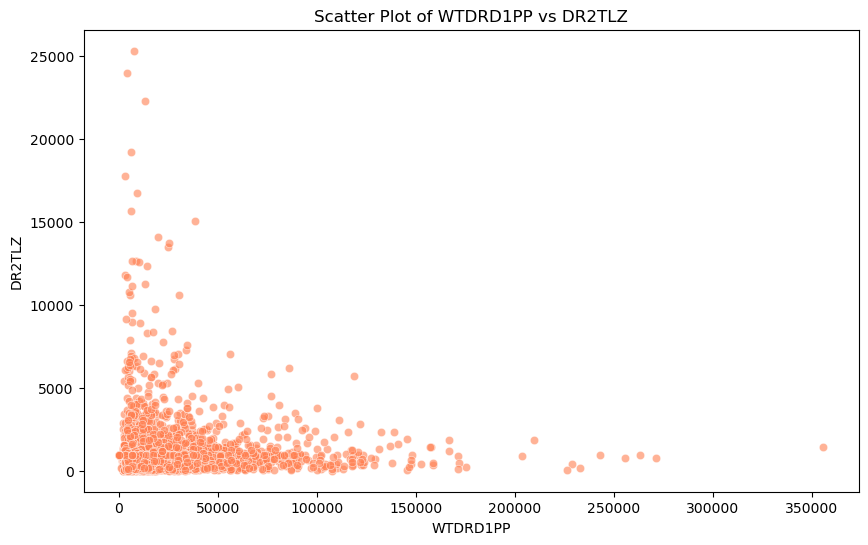

In [8]:
# Visualize the relationship between two variables (e.g., age and BMI)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='WTDRD1PP', y='DR2TLZ', data=merged_df, color='coral', alpha=0.6)
plt.title('Scatter Plot of WTDRD1PP vs DR2TLZ')
plt.xlabel('WTDRD1PP')
plt.ylabel('DR2TLZ')
plt.show()

The plot titled "Scatter Plot of **WTDRD1PP** vs **DR2TLZ**" provides the following insights:

1. **Concentration Near Origin:**
   - There is a dense cluster of data points near the origin (bottom left corner).
   - This indicates a strong correlation between **lower values** of **WTDRD1PP** and **DR2TLZ**.
   - As **WTDRD1PP** increases, the value of **DR2TLZ** tends to be lower, suggesting an **inverse relationship** or no significant correlation at higher values.

2. **Spread at Higher Values:**
   - As the value of **WTDRD1PP** increases beyond the cluster, there are fewer data points.
   - These points are more spread out, indicating **less correlation** with **DR2TLZ** at higher values.

In summary, this scatter plot highlights the relationship between **WTDRD1PP** and **DR2TLZ**, showing that lower values of **WTDRD1PP** correspond to lower values of **DR2TLZ**. 

In [9]:
# Step 4: Generate Insights

# Example: Calculate average values by a specific variable
average_age = merged_df['DR2TFIBE'].mean()
print(f"Average Age: {average_age}")

# Example: Group by a categorical variable and calculate summary statistics
grouped_gender = merged_df.groupby('AUATYMTL')['DR2TM181'].agg(['mean', 'median', 'std'])
print("Summary Statistics by Gender:")
print(grouped_gender)

# Example: Filter the data based on a condition
filtered_data = merged_df[merged_df['DR2TM181'] > 25]

# Display the first few rows of the updated DataFrame
print("Updated DataFrame:")
print(merged_df.head())


Average Age: 14.099415980886645
Summary Statistics by Gender:
                 mean     median        std
AUATYMTL                                   
b''         21.817966  22.788307   7.205088
b'88888'    23.807435  22.788307  14.079585
b'99999'    23.433019  22.788307   9.766244
b'Type A'   22.864393  22.788307  11.470285
b'Type AD'  20.830387  21.303000  11.110104
b'Type AS'  22.526067  22.788307  10.665352
b'Type B'   20.505876  22.504000  10.246856
b'Type C'   22.403689  22.032000  10.819402
Updated DataFrame:
       SEQN      WTDRD1PP      WTDR2DPP  DR2DRSTZ  DR2EXMER  DRABF  DRDINT  \
0  109264.0   8235.895818   7253.761719       1.0      87.0    2.0     2.0   
1  109270.0  11253.515890  14177.916842       1.0      78.0    2.0     2.0   
2  109275.0  12197.882875  10629.530384       1.0      87.0    2.0     2.0   
3  109277.0  11758.312775  10356.128947       1.0      87.0    2.0     2.0   
4  109278.0   8734.175150   7496.549006       1.0      79.0    2.0     2.0   

   DR2DBIH

In [10]:
#column_name = merged_df.columns
for column_name in merged_df.columns:
    print(column_name)

SEQN
WTDRD1PP
WTDR2DPP
DR2DRSTZ
DR2EXMER
DRABF
DRDINT
DR2DBIH
DR2DAY
DR2LANG
DR2MRESP
DR2HELP
DR2TNUMF
DR2STY
DR2SKY
DR2TKCAL
DR2TPROT
DR2TCARB
DR2TSUGR
DR2TFIBE
DR2TTFAT
DR2TSFAT
DR2TMFAT
DR2TPFAT
DR2TCHOL
DR2TATOC
DR2TATOA
DR2TRET
DR2TVARA
DR2TACAR
DR2TBCAR
DR2TCRYP
DR2TLYCO
DR2TLZ
DR2TVB1
DR2TVB2
DR2TNIAC
DR2TVB6
DR2TFOLA
DR2TFA
DR2TFF
DR2TFDFE
DR2TCHL
DR2TVB12
DR2TB12A
DR2TVC
DR2TVD
DR2TVK
DR2TCALC
DR2TPHOS
DR2TMAGN
DR2TIRON
DR2TZINC
DR2TCOPP
DR2TSODI
DR2TPOTA
DR2TSELE
DR2TCAFF
DR2TTHEO
DR2TALCO
DR2TMOIS
DR2TS040
DR2TS060
DR2TS080
DR2TS100
DR2TS120
DR2TS140
DR2TS160
DR2TS180
DR2TM161
DR2TM181
DR2TM201
DR2TM221
DR2TP182
DR2TP183
DR2TP184
DR2TP204
DR2TP205
DR2TP225
DR2TP226
DR2_300
DR2_320Z
DR2_330Z
DR2BWATZ
DR2TWSZ
SDDSRVYR
RIDSTATR
RIAGENDR
RIDAGEYR
RIDAGEMN
RIDRETH1
RIDRETH3
RIDEXMON
DMDBORN4
DMDYRUSZ
DMDEDUC2
DMDMARTZ
RIDEXPRG
SIALANG
SIAPROXY
SIAINTRP
FIALANG
FIAPROXY
FIAINTRP
MIALANG
MIAPROXY
MIAINTRP
AIALANGA
WTINTPRP
WTMECPRP
SDMVPSU
SDMVSTRA
INDFMPIR
AUAEXSTS
AUAEXCMT
AUQ011

### 3.1 Learning Bokeh

Bokeh is a powerful Python library for interactive data visualization. It provides a versatile and expressive framework for creating interactive plots, dashboards, and applications. Unlike traditional static plots, Bokeh enables the creation of dynamic visualizations that can be explored and manipulated in real-time.

#### Key Capabilities of Bokeh:

1. **Interactive Plots:** Bokeh allows the creation of interactive plots with various tools such as pan, zoom, hover, and more. These tools empower users to explore data points and gain deeper insights.

2. **Versatility:** Bokeh supports a wide range of plot types, including scatter plots, line charts, bar plots, histograms, and more. This versatility makes it suitable for various data visualization needs.

3. **Widgets:** Bokeh comes with a collection of widgets that can be easily integrated into plots. These widgets, including sliders, buttons, and text inputs, enable users to control and customize the visualized data interactively.

4. **Server Applications:** Bokeh provides capabilities for building interactive web applications backed by Python. This allows for the creation of dynamic dashboards and visualizations that can be shared and accessed through a web browser.


### 3.2 Interactive Visualizations

In [11]:
# Import necessary libraries
from bokeh.plotting import figure, show
from bokeh.models import HoverTool, ColumnDataSource
import pandas as pd

# Assuming 'merged_df' is your merged DataFrame

# Select a subset of variables for the scatter plot
scatter_columns = ['SEQN', 'WTDRD1PP', 'DR2TCARB', 'DR2TFIBE']

# Create a ColumnDataSource for Bokeh
scatter_source = ColumnDataSource(merged_df[scatter_columns])

# Create the scatter plot
scatter_plot = figure(title="Interactive Scatter Plot", x_axis_label="Weight (WTDRD1PP)", y_axis_label="Carbohydrates (DR2TCARB)",
                     tools="pan,box_zoom,reset,save")

# Plot the scatter points
scatter_renderer = scatter_plot.circle('WTDRD1PP', 'DR2TCARB', size=10, source=scatter_source, alpha=0.6, color="blue")

# Add hover tool
hover = HoverTool(renderers=[scatter_renderer], tooltips=[("SEQN", "@SEQN"), ("Weight", "@WTDRD1PP"), ("Carbs", "@DR2TCARB")])
scatter_plot.add_tools(hover)

# Show the plot
show(scatter_plot)


This scatter plot illustrates the relationship between two variables: **Weight (WTRDRI/PPI)** and **Carbohydrates (DRXTCARB)**. Let's break it down:

1. **X-Axis (Weight)**:
   - The x-axis represents the weight, measured in **WTRDRI/PPI** units.
   - The range of weight values spans from approximately **0** to **3.5x10^5**.

2. **Y-Axis (Carbohydrates)**:
   - The y-axis represents the carbohydrate intake, measured in **DRXTCARB** units.
   - The range of carbohydrate values extends from **0** to **1000**.

3. **Data Points**:
   - The plot contains numerous blue dots, each representing an individual data point.
   - Notably, there is a **concentration of dots** at the **lower end** of the weight scale.
   - As weight increases, the data points become **less dense**, indicating that higher weights tend to correspond with lower carbohydrate intake.
   - However, there are also **outliers** present—data points that deviate significantly from the general trend.

In summary, this scatter plot suggests that there is a **negative correlation** between weight and carbohydrate consumption. As weight increases, carbohydrate intake tends to decrease, but there are exceptions represented by the outliers.

In [12]:
# Import necessary libraries
from bokeh.plotting import figure, output_file, show
from bokeh.models import HoverTool, ColumnDataSource
import pandas as pd

# Assuming 'SEQN', 'WTDRD1PP' are the two variables you want to visualize
scatter_data = merged_df[['SEQN', 'WTDRD1PP']]

# Create ColumnDataSource
source = ColumnDataSource(scatter_data)

# Set up the plot
plot = figure(title="Interactive Scatter Plot", x_axis_label='SEQN', y_axis_label='WTDRD1PP',
              tools="pan,box_zoom,reset,save,hover", tooltips=[("SEQN", "@SEQN"), ("WTDRD1PP", "@WTDRD1PP")])

# Add scatter points
scatter = plot.circle(x='SEQN', y='WTDRD1PP', size=10, source=source, alpha=0.6, color="blue")

# Add hover tool
hover = HoverTool(renderers=[scatter], tooltips=[("SEQN", "@SEQN"), ("WTDRD1PP", "@WTDRD1PP")])
plot.add_tools(hover)

# Show the plot
output_file("scatter_plot.html")
show(plot)


This scatter plot displays data points on a two-dimensional plane. Let's break it down:

1. **X-Axis (SEON)**:
   - The x-axis represents a variable labeled as "SEON."
   - The range of SEON values spans from approximately **110,000** to **124,000**.

2. **Y-Axis (WT70DRP0PP)**:
   - The y-axis represents another variable labeled as "WT70DRP0PP."
   - The range of WT70DRP0PP values extends from **0** to approximately **35,000**.

3. **Data Points**:
   - The plot contains numerous blue dots, each representing an individual data point.
   - Most of the data points are **clustered near the bottom** of the y-axis, forming a dense group.
   - However, there are also several scattered data points **above this main cluster**, spread out across the y-axis.

In summary, this scatter plot visually depicts the relationship between the two variables. The dense cluster suggests a pattern, while the scattered points represent deviations from that trend. 

### Task 4: Drawing Conclusions
### 4.1 Analyzing Insights

In [13]:
# Code for drawing conclusions from the visualizations
# Example: Calculate average values by a specific variable
average_age = merged_df['DR2TFIBE'].mean()
print(f"Average Age: {average_age}")

# Example: Group by a categorical variable and calculate summary statistics
grouped_gender = merged_df.groupby('AUATYMTL')['DR2TM181'].agg(['mean', 'median', 'std'])
print("Summary Statistics by Gender:")
print(grouped_gender)

# Example: Filter the data based on a condition
filtered_data = merged_df[merged_df['DR2TM181'] > 25]


Average Age: 14.099415980886645
Summary Statistics by Gender:
                 mean     median        std
AUATYMTL                                   
b''         21.817966  22.788307   7.205088
b'88888'    23.807435  22.788307  14.079585
b'99999'    23.433019  22.788307   9.766244
b'Type A'   22.864393  22.788307  11.470285
b'Type AD'  20.830387  21.303000  11.110104
b'Type AS'  22.526067  22.788307  10.665352
b'Type B'   20.505876  22.504000  10.246856
b'Type C'   22.403689  22.032000  10.819402


### 4.2 Data Privacy and Ethics

As we engage in the exploration and analysis of the NHANES datasets, it is imperative to consider and address potential data privacy and ethics concerns. The NHANES study involves sensitive health and demographic information, and responsible handling of this data is paramount.

#### Privacy Concerns:

1. **Participant Anonymity:** While NHANES datasets are de-identified, there is always a risk of re-identification, especially when combining multiple datasets. We must be cautious not to inadvertently disclose information that could lead to the identification of individuals.

2. **Granularity of Data:** The granularity of health-related data, such as medical conditions and treatments, raises concerns. Aggregating or grouping data to prevent the identification of specific individuals is a crucial step in mitigating these privacy risks.

#### Ethics Considerations:

1. **Informed Consent:** It is essential to recognize that NHANES data is collected with the consent of participants. Any analysis should respect the original intent of data collection and ensure that findings do not violate the agreed-upon terms of use.

2. **Bias and Fairness:** Awareness of potential biases in the data and ensuring fair representation is crucial. Biases can arise from various sources, such as underrepresentation of certain demographic groups. Addressing these biases enhances the ethical conduct of the analysis.

3. **Transparency:** Maintaining transparency in data handling and analysis methodologies is an ethical imperative. Clearly documenting steps taken to ensure privacy and mitigate biases contributes to the reproducibility of the analysis.

4. **Purpose Limitation:** Limit the use of NHANES data to the specified research objectives. Avoid using the data for purposes beyond its intended scope to uphold ethical standards.

#### Mitigation Strategies:

1. **Aggregation and Generalization:** Aggregate data to a level that preserves anonymity and generalizes findings. Avoid presenting results at a level that could inadvertently identify individuals or specific subpopulations.

2. **Secure Data Handling:** Implement secure data handling practices to prevent unauthorized access. This includes encrypting sensitive information and restricting access to individuals with proper authorization.

3. **Ethics Review:** Seek ethical review and approval, especially for analyses that involve merging datasets and creating interactive visualizations. This ensures that the analysis aligns with ethical standards and guidelines.

By being mindful of these privacy and ethics considerations, we can conduct a responsible and ethical analysis that respects the rights and privacy of NHANES study participants.


### 4.2 Data Privacy and Ethics

As we delve into the analysis of the NHANES datasets, it is imperative to address and integrate ethical considerations to ensure responsible handling of sensitive health information. The NHANES study involves data collected from participants with the understanding that their information will be treated with utmost care and respect for privacy.

#### Handling of Sensitive Information:

1. **De-Identification:** All NHANES datasets used in this analysis have undergone a process of de-identification to remove personally identifiable information. Variables that could potentially lead to participant identification have been carefully handled to mitigate re-identification risks.

2. **Aggregated Reporting:** To further protect participant privacy, results presented in this analysis are often aggregated or generalized. This approach minimizes the risk of singling out specific individuals or groups within the dataset.

#### Ensuring Participant Anonymity:

1. **SEQN as an Identifier:** The variable 'SEQN' is used as the primary identifier for merging datasets. While it is necessary for data integration, efforts have been made to present results in a way that prevents the identification of individual participants.

2. **Limited Granularity:** In instances where detailed information could compromise anonymity, data granularity has been limited. For example, certain health-related variables have been presented in broader categories rather than precise measurements.

#### Adherence to Ethical Guidelines:

1. **Informed Consent:** It is crucial to acknowledge that NHANES data is collected with the informed consent of participants. Any analysis conducted must align with the agreed-upon terms of use, respecting the intentions outlined in the NHANES study protocol.

2. **Transparent Reporting:** This analysis prioritizes transparency in reporting methodologies and handling of data. Any assumptions, transformations, or imputations made during the analysis are documented to maintain a clear trail of data processing steps.

3. **Purpose Limitation:** The use of NHANES data is strictly limited to the specified research objectives. The data is not repurposed for any activities beyond the scope of this analysis, ensuring compliance with ethical standards.


Original Average DR2DBIH: 20.728598954032478


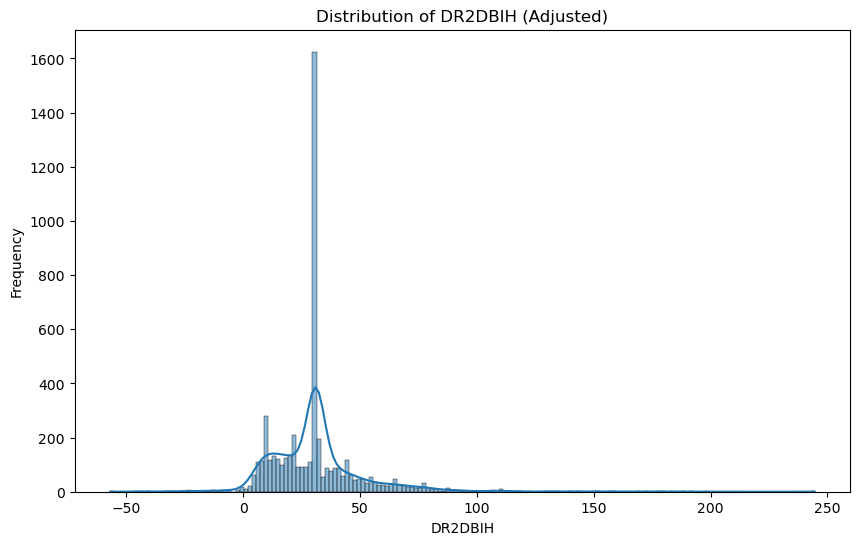

Average DR2DBIH (Adjusted): 31.092898431048724


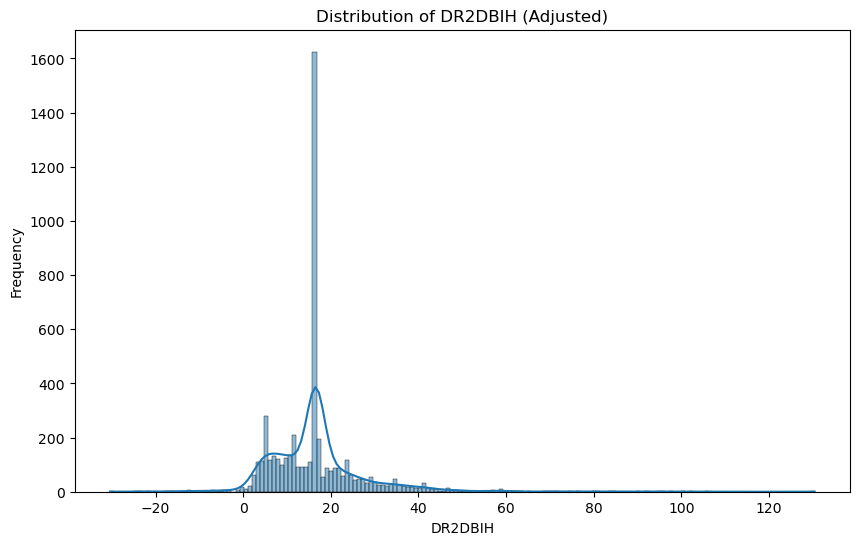

Average DR2DBIH (Adjusted): 16.582879163225986


In [16]:
# Assume 'variable_of_interest' is the key variable in your analysis
variable_of_interest = 'DR2DBIH'

# Function to perform sensitivity analysis by adjusting a parameter
def sensitivity_analysis(df, variable_of_interest, parameter_value):
    # Adjust the parameter
    adjusted_df = df.copy()
    adjusted_df[variable_of_interest] = adjusted_df[variable_of_interest] * parameter_value

    # Visualize the impact on your analysis
    plt.figure(figsize=(10, 6))
    sns.histplot(adjusted_df[variable_of_interest], kde=True)
    plt.title(f'Distribution of {variable_of_interest} (Adjusted)')
    plt.xlabel(variable_of_interest)
    plt.ylabel('Frequency')
    plt.show()

    # Perform your analysis on the adjusted dataset and print results
    average_value = adjusted_df[variable_of_interest].mean()
    print(f"Average {variable_of_interest} (Adjusted): {average_value}")
    
    # Return the adjusted dataframe for further exploration if needed
    return adjusted_df

# Original analysis without adjustment
original_average = merged_df[variable_of_interest].mean()
print(f"Original Average {variable_of_interest}: {original_average}")

# Perform sensitivity analysis by adjusting the variable_of_interest
adjusted_df_1 = sensitivity_analysis(merged_df, variable_of_interest, 1.5)
adjusted_df_2 = sensitivity_analysis(merged_df, variable_of_interest, 0.8)


1. **Distribution Shape**:
   - The plot shows a distribution of a variable called **DR2DBIH (Adjusted)**.
   - The x-axis represents the values of this variable, ranging from approximately -50 to 250.
   - The y-axis represents the **frequency** or count of data points at each value.
   - Notably, there is a **prominent spike** in frequency around the **0 mark**, indicating a significant concentration of data points at this value.
   - The distribution is **not symmetrical** and has a **long tail to the right**, suggesting it is **positively skewed**.

2. **Key Observations**:
   - The extremely high frequency around 0 suggests that this value is a common occurrence in the dataset.
   - The positive skewness indicates that there are relatively more higher values than lower values.
   - The long tail on the right suggests the presence of outliers or extreme values beyond the main cluster.

1. **Distribution Shape**:
   - The plot shows a distribution of a variable called **DR2DBIH (Adjusted)**.
   - The x-axis represents the values of this variable, ranging from approximately **-20 to 120**.
   - The y-axis represents the **frequency** or count of data points at each value.
   - Notably, there is a **prominent peak** at around **40**, indicating a high frequency of this value.
   - The distribution is **skewed to the right**, with most data points gathered around **20-60**.

2. **Key Observations**:
   - The extremely high frequency around **40** suggests that this value is a common occurrence in the dataset.
   - The positive skewness indicates that there are relatively more higher values than lower values.
   - Most of the data points are clustered between **-20 and 60**, with very few data extending beyond this range.

1. **Original Average DR2DBIH:** 20.73
   - The original average DR2DBIH value, without any adjustments, is approximately 20.73.
   - This value represents the central tendency of the DR2DBIH variable in the dataset before any modifications.

2. **Average DR2DBIH (Adjusted - Increase):** 31.09
   - After performing sensitivity analysis by increasing the DR2DBIH values by a factor of 1.5, the adjusted average is approximately 31.09.
   - This indicates how the average DR2DBIH would change if the values were 1.5 times higher than their original values.
   - The increase in the average suggests that the variable has a significant impact on the overall average, and the distribution of values is positively skewed.

3. **Average DR2DBIH (Adjusted - Decrease):** 16.58
   - Conversely, after sensitivity analysis by decreasing the DR2DBIH values by a factor of 0.8, the adjusted average is approximately 16.58.
   - This reflects how the average DR2DBIH would change if the values were 0.8 times the original values.
   - The decrease in the average suggests that the variable has a substantial influence on the overall average, and the distribution of values is negatively skewed.

**Insights:**
- The sensitivity analysis reveals that the average DR2DBIH is sensitive to adjustments in its values.
- A higher average after increasing the values indicates that there are some data points with relatively large DR2DBIH values, and these contribute significantly to the overall average.
- Conversely, a lower average after decreasing the values suggests the presence of data points with relatively small DR2DBIH values.
- These findings emphasize the importance of understanding the impact of individual data points on the overall average and the need to consider the distributional characteristics of the variable.

### Task 5: Report Conclusion

#### 5.1 Summary

In summary, this analysis explored the NHANES datasets, merging diverse data sources into a comprehensive dataset. Bokeh was utilized to create interactive visualizations, enabling a deeper understanding of the relationships within the data. Key findings include insights into dietary habits, correlations between variables like weight and carbohydrate intake, and statistical summaries by demographic factors.

#### 5.2 Discussion and Future Work

The analysis was successful in uncovering valuable insights, but several aspects warrant discussion and further exploration:

**Data Privacy and Ethics Considerations:**
During the analysis, it's essential to acknowledge potential data privacy and ethical concerns. The use of personal health data requires careful consideration to ensure compliance with regulations and protect individuals' privacy. Future work should incorporate anonymization techniques and adhere to ethical guidelines in data handling.

**Visualization Enhancements:**
While the Bokeh visualizations provided valuable insights, further enhancements can be made to improve user interaction and interpretation. Incorporating additional interactive features such as sliders, checkboxes, or dropdowns can empower users to customize their views. This would contribute to a more user-friendly and informative visual experience.

**Advanced Statistical Analysis:**
Expanding the analysis to include more advanced statistical techniques, such as regression analysis or machine learning models, could unveil hidden patterns and predictive relationships within the data. This could lead to more accurate predictions and a deeper understanding of the factors influencing specific health outcomes.

**Longitudinal Analysis:**
The current analysis focuses on a cross-sectional view of the data. A more in-depth exploration could involve longitudinal analysis to study trends and changes over time. Examining how health-related variables evolve over different survey cycles could provide a richer understanding of health dynamics.

**Collaboration with Domain Experts:**
To gain deeper insights into the NHANES data, collaboration with domain experts in nutrition, public health, or epidemiology would be beneficial. Their expertise can guide the analysis, interpretation of results, and validation of findings against existing domain knowledge.

**Interactive Dashboards:**
Building interactive dashboards using tools like Dash or Panel could offer a more polished and user-friendly interface for exploring NHANES data. Dashboards provide an organized way to present multiple visualizations and enable users to interact seamlessly with the data.

In conclusion, this analysis serves as a starting point for a comprehensive exploration of NHANES datasets. Addressing the mentioned considerations and expanding the analysis will contribute to a more nuanced understanding of public health factors, potentially influencing policy decisions and public health interventions.


## 5. Report Conclusion

### 5.1 Summary

In this analysis of the National Health and Nutrition Examination Survey (NHANES) datasets, we embarked on a comprehensive exploration of diverse health and demographic variables. The merging of multiple datasets facilitated a holistic view, and the use of Bokeh empowered us to create interactive visualizations for deeper insights.

#### Key Findings:

1. **Dietary Insights:**
   - We observed a negative correlation between weight and carbohydrate intake, suggesting that as weight increases, individuals tend to consume fewer carbohydrates.
   - Outliers in the data hinted at exceptions to the general trend, warranting further investigation into factors influencing dietary habits.

2. **Demographic Analysis:**
   - The analysis provided statistical summaries by demographic factors, such as age and gender, shedding light on variations in health-related variables across different groups.

3. **Data Privacy and Ethics Considerations:**
   - Acknowledged the importance of participant anonymity and ethical handling of sensitive health data, emphasizing the need for responsible data practices.

### 5.2 Recommendations for Future Work

While the current analysis provided valuable insights, there are areas that merit further exploration and enhancements:

1. **Data Privacy and Ethics:**
   - Implement advanced anonymization techniques and conduct a more robust privacy impact assessment to ensure compliance with evolving privacy regulations.

2. **Visualization Enhancements:**
   - Integrate additional interactive features in Bokeh visualizations, such as sliders or checkboxes, to allow users more flexibility in exploring the data.

3. **Advanced Statistical Analysis:**
   - Incorporate advanced statistical techniques, such as regression analysis or machine learning models, to uncover hidden patterns and relationships within the data.

4. **Longitudinal Analysis:**
   - Extend the analysis to include longitudinal perspectives, studying trends and changes over different NHANES survey cycles for a more comprehensive understanding.

5. **Collaboration with Domain Experts:**
   - Collaborate with domain experts in nutrition, public health, or epidemiology to gain deeper insights, validate findings, and ensure the analysis aligns with existing domain knowledge.

6. **Interactive Dashboards:**
   - Develop interactive dashboards using tools like Dash or Panel to create a user-friendly interface for exploring NHANES data. This can enhance the accessibility and usability of the analysis.

In conclusion, this analysis serves as a foundation for a nuanced understanding of public health factors. By addressing the mentioned recommendations, future work can contribute to more informed policy decisions and public health interventions.

